## 데이터 불러오기

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [39]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/dejavu: skipping, looped directory detecte

In [40]:
import pymongo
client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
collection=db['accompany_2023']
data = collection.find()
df_accompany = pd.DataFrame(data)
df_accompany

,_id,기준연월,동반유형명,언급건수,지역구분
0,65d866aabb908e26c802af5d,202308,기타가족,115629,인천
1,65d866aabb908e26c802af5e,202312,기타가족,110697,인천
2,65d866aabb908e26c802af5f,202307,기타가족,109663,인천
3,65d866aabb908e26c802af60,202310,기타가족,108737,인천
4,65d866aabb908e26c802af61,202305,기타가족,108036,인천
...,...,...,...,...,...
535,65d866aabb908e26c802b174,202310,학생,8098,강원
536,65d866aabb908e26c802b175,202303,학생,8051,강원
537,65d866aabb908e26c802b176,202311,학생,8051,강원
538,65d866aabb908e26c802b177,202305,학생,7678,강원


In [41]:
import pymongo
client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
collection=db['accompany_keyword_2023']
data = collection.find()
df_accompany_keyword = pd.DataFrame(data)
df_accompany_keyword.query('분류 == "학생"')

,_id,순위,분류,관련 키워드,언급건수,지역구분
29,65dc4814bb908e26c802e9e1,30,학생,초등학생,30587,인천
36,65dc4814bb908e26c802e9e8,37,학생,대학생,23377,인천
50,65dc4814bb908e26c802e9f6,51,학생,중학생,14040,인천
53,65dc4814bb908e26c802e9f9,54,학생,고등학생,13193,인천
69,65dc4814bb908e26c802ea09,70,학생,초딩,8552,인천
...,...,...,...,...,...,...
1826,65dc4814bb908e26c802f0e6,188,학생,초4,788,강원
1827,65dc4814bb908e26c802f0e7,189,학생,고삼,728,강원
1832,65dc4814bb908e26c802f0ec,194,학생,초5,685,강원
1855,65dc4814bb908e26c802f103,217,학생,초2,504,강원


In [42]:
df_accompany['동반유형명'].value_counts()

동반유형명
기타가족    60
친구      60
회사동료    60
부모님     60
자녀      60
배우자     60
싱글      60
연인      60
학생      60
Name: count, dtype: int64

## 데이터 전처리

### 결측치 확인

In [43]:
df_accompany.isnull().sum()

_id      0
기준연월     0
동반유형명    0
언급건수     0
지역구분     0
dtype: int64

In [44]:
df_accompany_keyword.isnull().sum()

_id       0
순위        0
분류        0
관련 키워드    0
언급건수      0
지역구분      0
dtype: int64

In [45]:
df_accompany_keyword['관련 키워드'].value_counts()

관련 키워드
울랑이      5
아이들아빠    5
와이프느님    5
외할아버님    5
며늘애      5
        ..
우리부인     1
첫째손주     1
홀캉스      1
마낫님      1
예비시아빠    1
Name: count, Length: 423, dtype: int64

In [46]:
df_accompany['동반유형명'].unique()

array(['기타가족', '친구', '회사동료', '부모님', '자녀', '배우자', '싱글', '연인', '학생'],
      dtype=object)

### 비슷한 동반유형명 통일

In [47]:
family_list = ['기타가족','부모님','자녀','배우자']
condition_family = f"동반유형명 in {family_list}"
df_accompany.loc[df_accompany.query(condition_family).index,'동반유형명']="가족"

In [48]:
df_accompany['동반유형명'].unique()

array(['가족', '친구', '회사동료', '싱글', '연인', '학생'], dtype=object)

### 관련 없는 동반유형명 삭제

In [49]:
df_accompany = df_accompany.drop(list(df_accompany.query("동반유형명=='학생'").index))

In [50]:
df_accompany.query("동반유형명=='학생'")

,_id,기준연월,동반유형명,언급건수,지역구분


### 동반 유형별 언급건수 확인

In [51]:
pivot_accompany= pd.pivot_table(data=df_accompany,index=['동반유형명'], values=['언급건수'],columns=['기준연월'], aggfunc='sum')
pivot_accompany=pivot_accompany.loc[:,'언급건수']
pivot_accompany

기준연월,202301,202302,202303,202304,202305,202306,202307,202308,202309,202310,202311,202312
동반유형명,,,,,,,,,,,,
가족,1531211,1486639,1586251,1569915,1811072,1799385,1868967,2024762,1786088,1834109,1792104,1866623
싱글,189139,188529,201430,196404,211585,224835,239541,254801,224482,221709,225698,231463
연인,144027,152177,170891,168656,191085,203444,209997,226793,207444,208702,216496,238636
친구,469539,480851,551530,539607,590993,632138,689576,743655,672432,668137,707408,759265
회사동료,298533,295775,340726,374500,389223,424240,495438,526299,488365,488114,544659,572078


In [92]:
pivot_accompany.loc['total',202301]=pivot_accompany[202301].sum()
pivot_accompany.loc['total',202302]=pivot_accompany[202302].sum()
pivot_accompany.loc['total',202303]=pivot_accompany[202303].sum()
pivot_accompany.loc['total',202304]=pivot_accompany[202304].sum()
pivot_accompany.loc['total',202305]=pivot_accompany[202305].sum()
pivot_accompany.loc['total',202306]=pivot_accompany[202306].sum()
pivot_accompany.loc['total',202307]=pivot_accompany[202307].sum()
pivot_accompany.loc['total',202308]=pivot_accompany[202308].sum()
pivot_accompany.loc['total',202309]=pivot_accompany[202309].sum()
pivot_accompany.loc['total',202310]=pivot_accompany[202310].sum()
pivot_accompany.loc['total',202311]=pivot_accompany[202311].sum()
pivot_accompany.loc['total',202312]=pivot_accompany[202312].sum()
pivot_accompany.loc['가족','total']=pivot_accompany.loc['가족',:].sum()
pivot_accompany.loc['싱글','total']=pivot_accompany.loc['싱글',:].sum()
pivot_accompany.loc['연인','total']=pivot_accompany.loc['연인',:].sum()
pivot_accompany.loc['친구','total']=pivot_accompany.loc['친구',:].sum()
pivot_accompany.loc['회사동료','total']=pivot_accompany.loc['회사동료',:].sum()
pivot_accompany.loc['total','total']=pivot_accompany.loc['total',:].sum()
# pivot_accompany.loc[:'회사동료',:202312]
pivot_accompany
# pivot_accompany.loc['total',202301]=pivot_accompany[202301].sum()
# pivot_accompany[202301].sum()

기준연월,202301,202302,202303,202304,202305,202306,202307,202308,202309,202310,202311,202312,total
동반유형명,,,,,,,,,,,,,
가족,1531211.0,1486639.0,1586251.0,1569915.0,1811072.0,1799385.0,1868967.0,2024762.0,1786088.0,1834109.0,1792104.0,1866623.0,125742756.0
싱글,189139.0,188529.0,201430.0,196404.0,211585.0,224835.0,239541.0,254801.0,224482.0,221709.0,225698.0,231463.0,15657696.0
연인,144027.0,152177.0,170891.0,168656.0,191085.0,203444.0,209997.0,226793.0,207444.0,208702.0,216496.0,238636.0,14030088.0
친구,469539.0,480851.0,551530.0,539607.0,590993.0,632138.0,689576.0,743655.0,672432.0,668137.0,707408.0,759265.0,45030786.0
회사동료,298533.0,295775.0,340726.0,374500.0,389223.0,424240.0,495438.0,526299.0,488365.0,488114.0,544659.0,572078.0,31427700.0
total,18427143.0,15623826.0,17104968.0,17094492.0,19163748.0,19704252.0,21021114.0,22657860.0,20272866.0,20524626.0,20918190.0,22008390.0,822141387.0


## 기술 데이터 분석(DDA)

### 데이터 분포 확인
* 언급량이 8월, 12월, 7월 순으로 가장 많고, 2월,1월,3월 순으로 가장 적음
* 가족, 친구, 회상동료, 싱글, 연인 순으로 언급량이 많음
* 서울, 부산, 인천, 강원, 제주 순으로 언급량이 많음

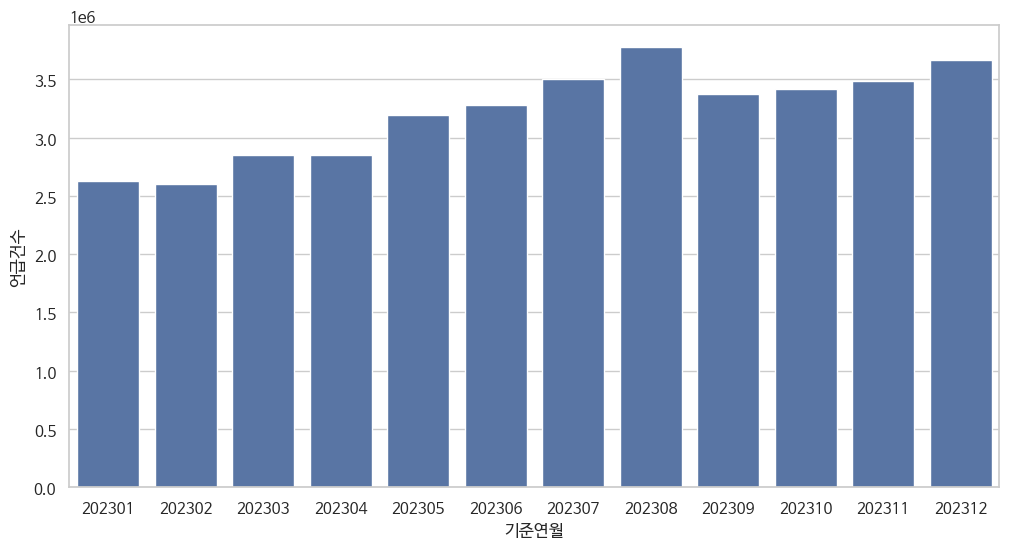

In [151]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_accompany,x='기준연월',y='언급건수', estimator=sum,errorbar=None)
plt.show()

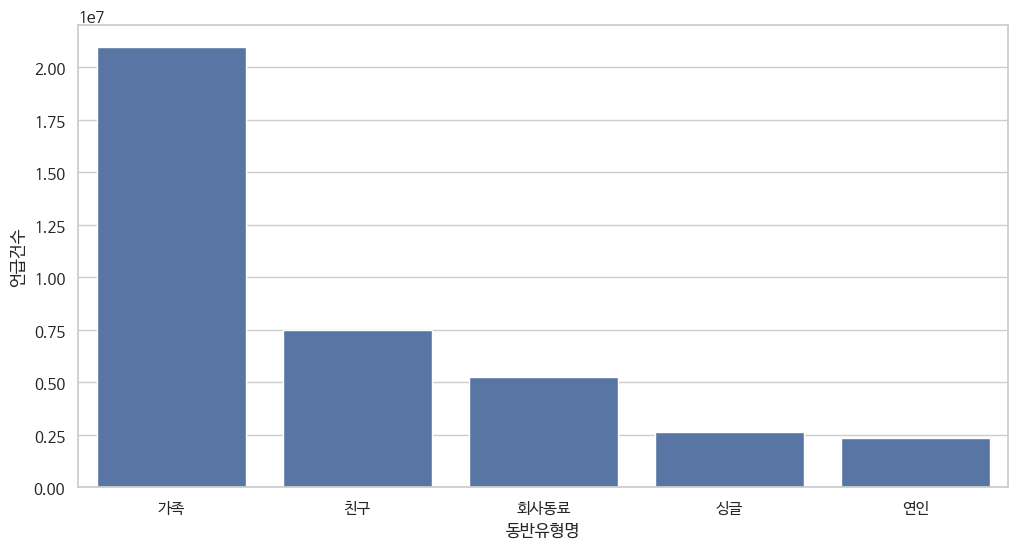

In [152]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_accompany,x='동반유형명',y='언급건수', estimator=sum,errorbar=None)
plt.show()

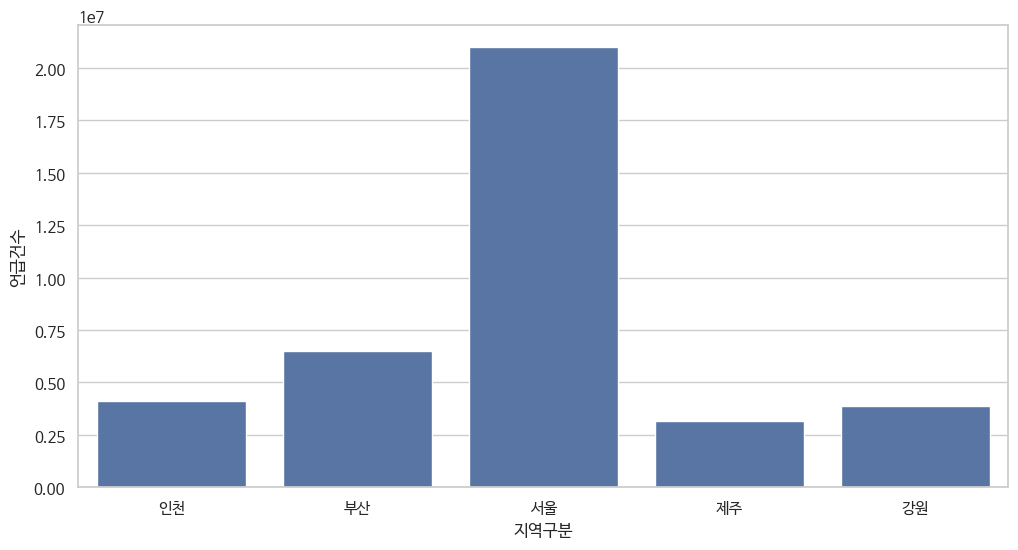

In [153]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_accompany,x='지역구분',y='언급건수', estimator=sum,errorbar=None)
plt.show()

## 탐색 데이터 분석(EDA)

### 월별 동반유형 비교
* 월별로 확인했을 때는 큰 차이가 없었지만 비교적 1,2월에는 검색량이 적었고, 8월,12월에는 많음
* 휴가철과 송년회가 영향을 미쳤을 것으로 예상
* 특히, 회사동료의 경우 12월에 가장 많은 검색량을 보였는데, 송년회의 영향일 것으로 예상됨

In [110]:
pivot_accompany.loc[:'회사동료','total'].sort_values(ascending=False)

동반유형명
가족      125742756.0
친구       45030786.0
회사동료     31427700.0
싱글       15657696.0
연인       14030088.0
Name: total, dtype: float64

In [107]:
pivot_accompany.loc['total',:202312].sort_values(ascending=False)

기준연월
202308    22657860.0
202312    22008390.0
202307    21021114.0
202311    20918190.0
202310    20524626.0
202309    20272866.0
202306    19704252.0
202305    19163748.0
202301    18427143.0
202303    17104968.0
202304    17094492.0
202302    15623826.0
Name: total, dtype: float64

In [111]:
pivot_accompany.loc['가족',:202312].sort_values(ascending=False)

기준연월
202308    2024762.0
202307    1868967.0
202312    1866623.0
202310    1834109.0
202305    1811072.0
202306    1799385.0
202311    1792104.0
202309    1786088.0
202303    1586251.0
202304    1569915.0
202301    1531211.0
202302    1486639.0
Name: 가족, dtype: float64

In [112]:
pivot_accompany.loc['친구',:202312].sort_values(ascending=False)

기준연월
202312    759265.0
202308    743655.0
202311    707408.0
202307    689576.0
202309    672432.0
202310    668137.0
202306    632138.0
202305    590993.0
202303    551530.0
202304    539607.0
202302    480851.0
202301    469539.0
Name: 친구, dtype: float64

In [115]:
pivot_accompany.loc['연인',:202312].sort_values(ascending=False)

기준연월
202312    238636.0
202308    226793.0
202311    216496.0
202307    209997.0
202310    208702.0
202309    207444.0
202306    203444.0
202305    191085.0
202303    170891.0
202304    168656.0
202302    152177.0
202301    144027.0
Name: 연인, dtype: float64

In [114]:
pivot_accompany.loc['싱글',:202312].sort_values(ascending=False)

기준연월
202308    254801.0
202307    239541.0
202312    231463.0
202311    225698.0
202306    224835.0
202309    224482.0
202310    221709.0
202305    211585.0
202303    201430.0
202304    196404.0
202301    189139.0
202302    188529.0
Name: 싱글, dtype: float64

In [149]:
pivot_accompany.loc['회사동료',:202312].sort_values(ascending=False)

기준연월
202312    572078.0
202311    544659.0
202308    526299.0
202307    495438.0
202309    488365.0
202310    488114.0
202306    424240.0
202305    389223.0
202304    374500.0
202303    340726.0
202301    298533.0
202302    295775.0
Name: 회사동료, dtype: float64

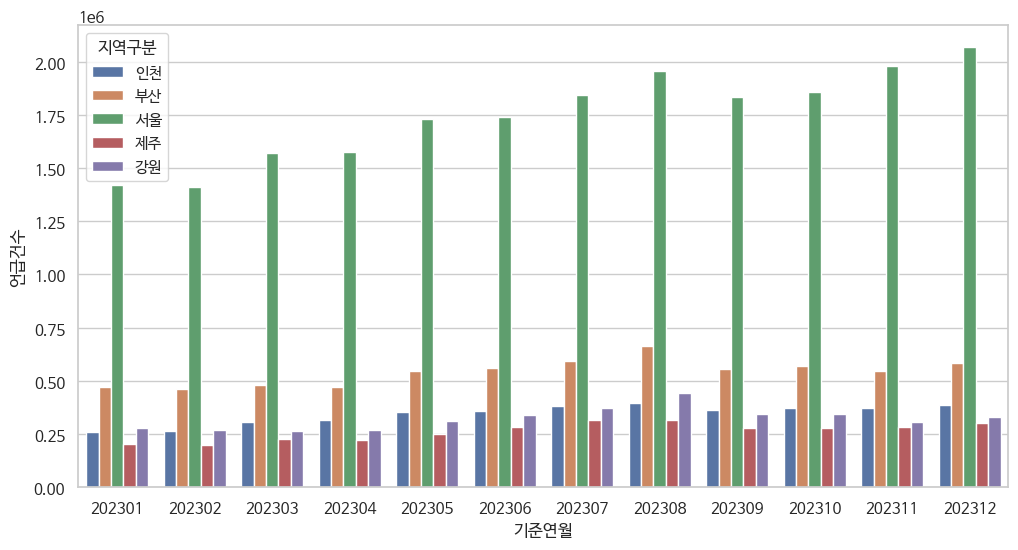

In [126]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_accompany,x='기준연월',y='언급건수', hue='지역구분', estimator=sum,errorbar=None)
plt.show()

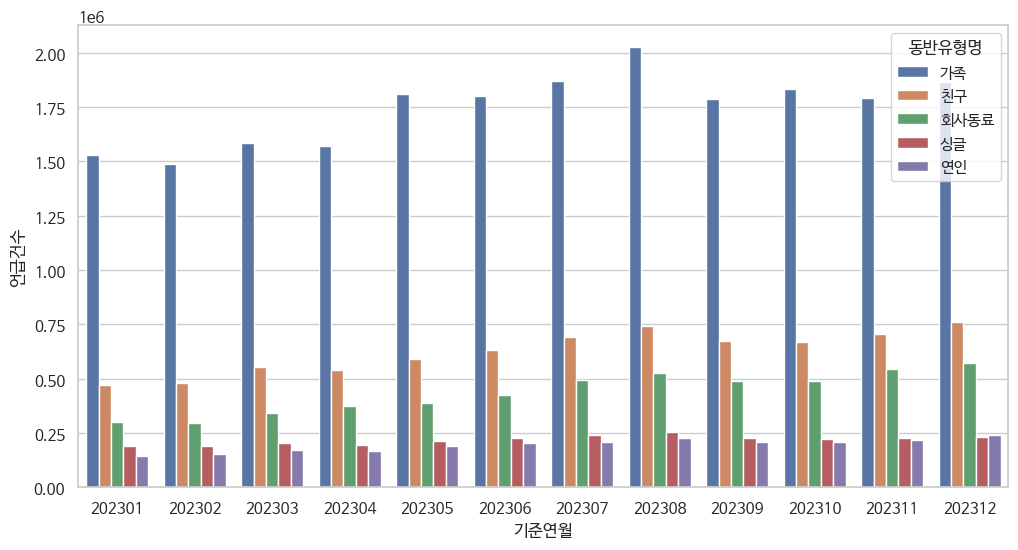

In [121]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_accompany,x='기준연월',y='언급건수', hue='동반유형명', estimator=sum,errorbar=None)
plt.show()

In [123]:
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=df_accompany,x='기준연월',y='언급건수', hue='동반유형명', estimator=sum,errorbar=None)
# plt.show()

### 지역과 동반유형 비교
* 전체적으로 서울에 관련된 검색량이 가장 많았고, 부산, 인천,제주,강원 순으로 많음
* 하지만, 가족의 경우 강원이 인천, 제주보다 검색량이 더 많음

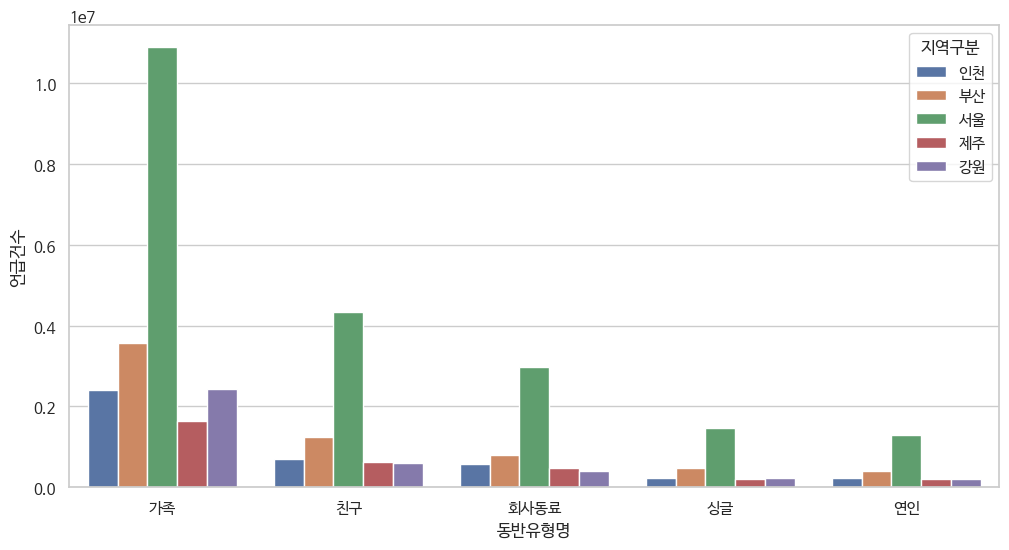

In [147]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_accompany,x='동반유형명',y='언급건수',hue='지역구분', estimator=sum,errorbar=None)
plt.show()

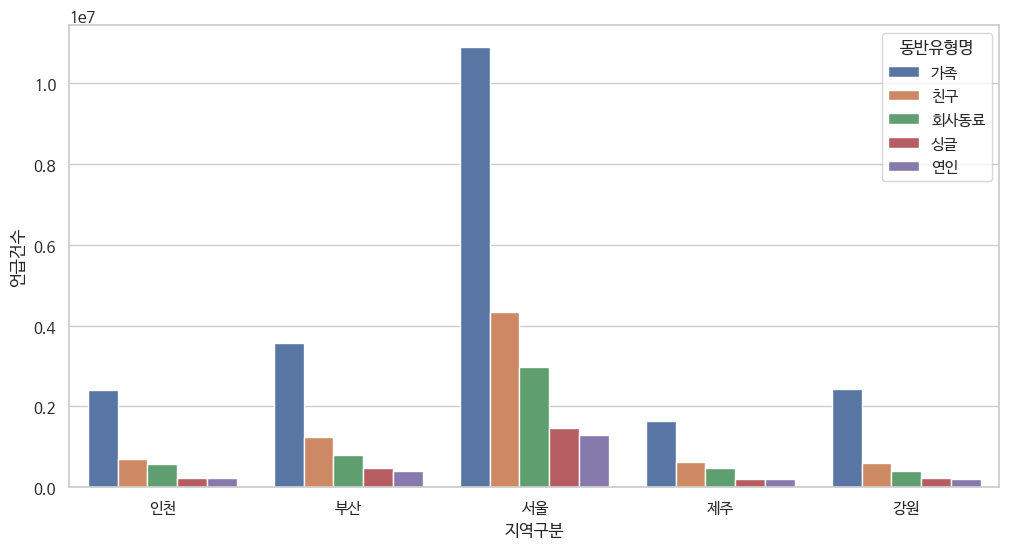

In [141]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_accompany,x='지역구분',y='언급건수',hue='동반유형명', estimator=sum,errorbar=None)
plt.show()

## 평가

### 정리
* 다른 동반 유형에 비해 가족의 검색량이 상당히 많음
* 다른 지역에 비해 서울의 검색량이 상당히 많음
* 월별로 확인했을 때는 큰 차이가 없었지만 비교적 1,2월에는 검색량이 적었고, 8월,12월에는 많음

### 결론
* 월별로 확인했을 때 8,12월에 검색량이 많은 것은 휴가철과 송년회가 영향을 미쳤을 것으로 예상
* 특히, 회사동료의 경우 12월에 가장 많은 검색량을 보였는데, 송년회의 영향일 것으로 예상됨
* 서울 지역의 검색량이 상당히 많았는데, 이는 모임의 목적으로 만나기 위해 검색한 데이터도 포함되어 이러한 결과가 나온 것으로 예상